# TQC 人工智慧 機器學習 證照 攻略 (上)
## 第一類監督學習 解題分享 (3/5)

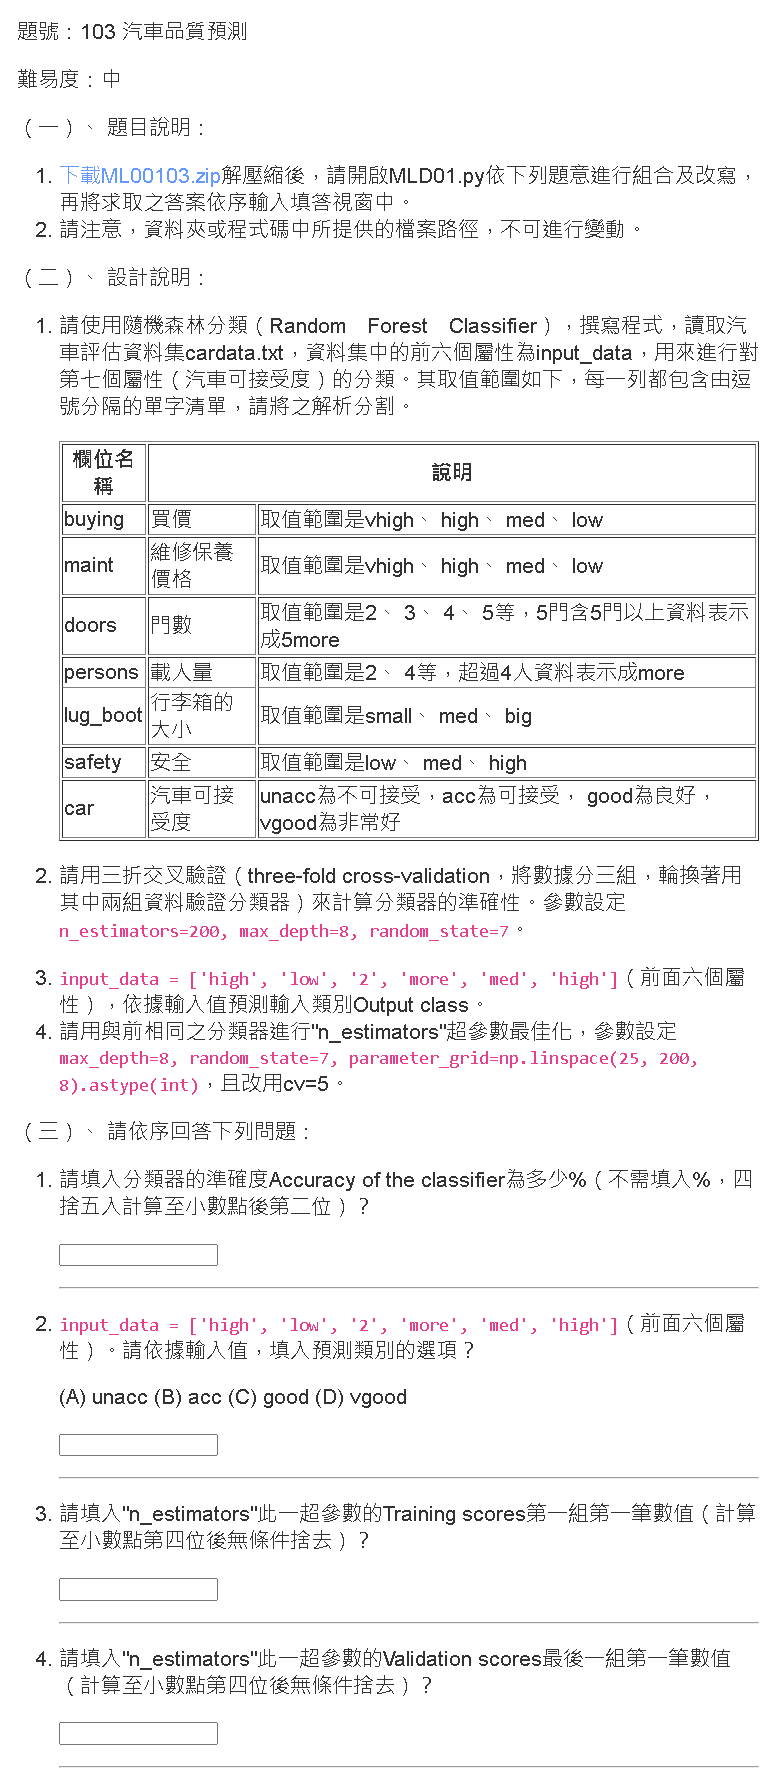

In [1]:
import numpy as np
# Reading the data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('cardata.txt', header=None)
df = data.copy()

# Convert string data to numerical data將字串資料轉換為數值資料
from sklearn.preprocessing import LabelEncoder
le_en = []
for i in range(df.shape[1]):
    le =  LabelEncoder().fit(df[i])
    le_en.append(le)
    df[i] = le_en[-1].transform(df[i])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Build a Random Forest classifier建立隨機森林分類器
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=7)
model.fit(X, y)

# Cross validation交叉驗證
from sklearn.model_selection import cross_validate
cv_dic = cross_validate(model, X, y, cv=3)
score = (cv_dic.get('test_score')).mean()
print(f"Accuracy of the classifier= {score*100:.2f} %")

# Testing encoding on single data instance測試單個資料實例上的編碼
input_data = pd.DataFrame(['high', 'low', '2', 'more', 'med', 'high']).T
for i in range(input_data.shape[1]):
    input_data[i] = le_en[i].transform(input_data[i])
# Predict and print output for a particular datapoint
input_pred = model.predict(input_data)
label = le_en[-1].inverse_transform(input_pred)
print(f"Output class= {label[0]}")

# Validation curves 驗證曲線
parameter_grid = np.linspace(25, 200, 8).astype(int)
from sklearn.model_selection import validation_curve
train_scores, validation_scores = validation_curve(model, X, y, 
        'n_estimators', parameter_grid, cv=5)
print("##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

Accuracy of the classifier= 77.66 %
Output class= acc
##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.97467438 0.97105644 0.97105644 0.97686189 0.96529284]
 [0.97322721 0.97322721 0.97539797 0.98698482 0.96963124]
 [0.97684515 0.97467438 0.97322721 0.98770788 0.98047722]
 [0.97612156 0.97684515 0.97467438 0.98770788 0.97903109]
 [0.97467438 0.97684515 0.97539797 0.98698482 0.98047722]
 [0.97539797 0.97539797 0.97756874 0.98553868 0.97903109]
 [0.97322721 0.97612156 0.97756874 0.98553868 0.97758496]
 [0.97322721 0.97612156 0.97539797 0.98626175 0.97541576]]

Param: n_estimators
Validation scores:
 [[0.66184971 0.78612717 0.79768786 0.8057971  0.88115942]
 [0.67919075 0.80057803 0.78612717 0.7884058  0.89855072]
 [0.65317919 0.79190751 0.78612717 0.78550725 0.90434783]
 [0.63294798 0.79479769 0.76589595 0.7826087  0.91304348]
 [0.66473988 0.77745665 0.79190751 0.79130435 0.90144928]
 [0.70520231 0.77745665 0.79479769 0.79130435 0.90434783]
 [0.65028902 0.7716763 